# Solution
To solve this predictional question, I use the classification model to calculate the probability of fraud which can occur for each customer.

However, we must handle the data before fitting the model. In here, we face a big data frame problem when merging a table of 151112 data points for 11 columns with a table of 138846 data points for 3 columns. Thus, it will take a large amount of computer memory to sort or merge these tables, and we can not run this code in the normal computer. To solve this, I use np.where to simplify it as SQL problem and find out the relevant index number of specific columns connecting two tables.

After that, I analyze the features to fit with the classification model, such as encoding the categorical features or segmenting the numeric ones. At the end of this step, I find out the final database for modeling.

Finally, I fit the model with 6 classification algorithms  to find out what is the best model to solve this problem. Therefore, I create two criteria for choosing these methods:

- Accuracy:  the model must give the most correct result.
- Running time: the model must have the shortest running time and does not  waste computer memory.

The working process will show more details as belows.

[Adjusting the data](#1)

[Feature Engineering](#2)

[Modeling](#3)




In [2]:
# google colab setting
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Saving requirement
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

df_fraud = pd.read_csv('drive/My Drive/DS-course2 - Dr. Xuan Ha/w2/Fraud_Data.csv')
df_fraud.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
df_fraud.info()
#print(df_fraud[df_fraud.isnull().any(axis=1)])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [49]:
df_ipcountry = pd.read_csv('drive/My Drive/DS-course2 - Dr. Xuan Ha/w2/IpAddress_to_Country.csv')
df_ipcountry.head(5)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [50]:
df_ipcountry.shape

(138846, 3)

# <a name ="1"></a> Adjusting the data

In [0]:
x = df_fraud.ip_address.values
xlower = df_ipcountry.lower_bound_ip_address.values
xupper = df_ipcountry.upper_bound_ip_address.values
#n,m = np.where((x[0:20000,None] >= xlower) & (x[0:20000,None] <= xupper))

In [9]:
# Mapping the ip_address with df_ipcountry to find country name
start_time = time.time()
i = 0

while i <= x.size:  
  if i == 0:
    a,b = np.where((x[i:i+30000,None] >= xlower) & (x[i:i+30000,None] <= xupper))
    # np.where tựng hiện mapping giá trị ở x = ip_address với giá trị ở xlower và
    # xupper ở bảng df_ipcountry -> trả về thứ tự vị trí tương ứng a trên df_fraud
    # và b trên df_ipcountry.
    n = a
    m = b
    print("i = %d ,processing..."%i)
  elif i < 150000:
    a,b = np.where((x[i:i+30000,None] >= xlower) & (x[i:i+30000,None] <= xupper))
    n = np.concatenate((n,a + i),axis = 0) 
    # cộng i bởi vì mỗi loop chỉ thực hiện 30000 dòng, cộng thêm để ra vị trí đúng
    m = np.concatenate((m , b ),axis = 0)
    print("i = %d ,processing..."%i)
  else:
    a,b = np.where((x[i:151112,None] >= xlower) & (x[i:151112,None] <= xupper))
    n = np.concatenate((n,(a+150000)),axis = 0) # tương tự cho vòng lặp cuối
    m = np.concatenate((m,b),axis = 0)  
    print("i = 151112 .end.")
  i +=  30000
  
print("--- %s seconds ---" % (time.time() - start_time))

i = 0 ,processing...
i = 30000 ,processing...
i = 60000 ,processing...
i = 90000 ,processing...
i = 120000 ,processing...
i = 151112 .end.
--- 115.04504013061523 seconds ---


In [0]:
# merging df_freau and df_ipcountry with specific index number of cols to generate
# the df_result which uses for modeling.
df_result = pd.DataFrame(
    np.column_stack([df_fraud.values[n], df_ipcountry.values[m]])
    ,columns=df_fraud.columns.append(df_ipcountry.columns)
).append(
    df_fraud[~np.in1d(np.arange(len(df_fraud)), np.unique(n))],
    ignore_index=True
)

In [11]:
df_result.shape

(151112, 14)

In [12]:
df_result['country'].isna().sum()

21966

In [0]:
# I decide to drop 21966 data points with na in country or ip_adress. 
# We can debug this problem by using the geoip package to tracki the real country 
# for each ip_address. However,this is just an idea, thus it can make bias or mistake
# when modeling the dataframe.
df_result = pd.DataFrame(
    np.column_stack([df_fraud.values[n], df_ipcountry.values[m]])
    ,columns=df_fraud.columns.append(df_ipcountry.columns)
)

In [14]:
pd.options.display.float_format = '{:.2f}'.format
df_result.sample(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
114608,1288,2015-02-20 00:31:38,2015-05-14 18:58:26,46,HVFCWQFPXGHPU,Ads,Safari,M,45,223970328.53,0,222298112.00,224395263,United States
70768,242596,2015-03-17 13:03:33,2015-03-27 22:56:13,39,QSIYWMVZUGHOQ,Ads,IE,M,26,3449317189.05,0,3449290752.00,3449356287,United States
96189,244819,2015-03-18 04:07:01,2015-05-06 07:46:40,82,VLDEADIGZUVSJ,Ads,Opera,M,19,3145035997.09,1,3144941568.00,3145203711,Brazil
19044,224555,2015-02-28 09:35:44,2015-04-24 08:33:24,22,YKPSRNNIHJMDX,SEO,Chrome,F,32,198883524.99,0,184549376.00,201326591,United States
71759,262814,2015-07-30 22:33:30,2015-09-03 14:55:53,22,RIUDDYQSTIVLQ,SEO,Chrome,M,48,220046068.09,0,218103808.00,222298111,United States


In [15]:
df_result.shape

(129146, 14)

In [16]:
# check null in df_result
#print('Train columns with null values:\n', df_result.isnull().sum())
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129146 entries, 0 to 129145
Data columns (total 14 columns):
user_id                   129146 non-null object
signup_time               129146 non-null object
purchase_time             129146 non-null object
purchase_value            129146 non-null object
device_id                 129146 non-null object
source                    129146 non-null object
browser                   129146 non-null object
sex                       129146 non-null object
age                       129146 non-null object
ip_address                129146 non-null object
class                     129146 non-null object
lower_bound_ip_address    129146 non-null object
upper_bound_ip_address    129146 non-null object
country                   129146 non-null object
dtypes: object(14)
memory usage: 13.8+ MB


# <a name="2"></a> Feature Engineering
Dividing the feature of df_result into 2 types: Category and Numeric.


In [17]:
# categorical features ['source','browser','sex','country']
categorical_cols = ['class','device_id','source','browser','sex','country']
df_result[categorical_cols].head(5)

,class,device_id,source,browser,sex,country
0,0,QVPSPJUOCKZAR,SEO,Chrome,M,Japan
1,0,EOGFQPIZPYXFZ,Ads,Chrome,F,United States
2,1,YSSKYOSJHPPLJ,SEO,Opera,M,United States
3,0,NAUITBZFJKHWW,Ads,Safari,M,United States
4,0,ALEYXFXINSXLZ,Ads,Chrome,M,Canada


In [18]:
# I can feature out
# 1. Showing the numer of fraud in each country
fraud_country = df_result[['country','class']].groupby(['country']).agg({"class": "sum"})
print(fraud_country.sort_values('class',ascending=False).head())

                   class
country                 
United States       5551
China               1043
Japan                715
United Kingdom       477
Korea Republic of    380


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


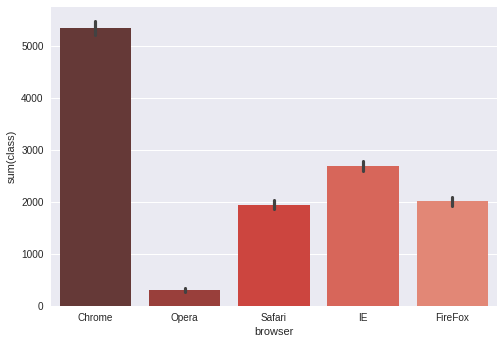

In [19]:
fraud_brower = df_result[['browser','class']]
sns.barplot(x="browser", y="class", data=fraud_brower, palette="Reds_d", estimator = sum)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


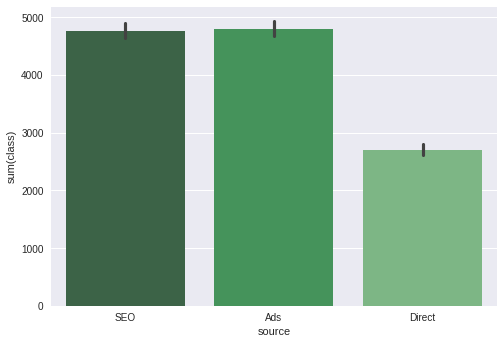

In [20]:
fraud_source = df_result[['source','class']]
sns.barplot(x="source", y="class", data=fraud_source, palette="Greens_d", estimator = sum)

In [21]:
# encoding the categorical features ['source','browser','sex','country']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_result[['source','browser','sex','country']] = df_result[['source','browser','sex','country']].apply(le.fit_transform)
df_result.sample(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
8973,120917,2015-01-27 21:14:34,2015-03-04 10:55:39,13,LSHILMMVKBBXI,2,0,1,37,1918413665.84,0,1917845504.00,1918894079,36
12872,282769,2015-07-27 14:57:49,2015-10-20 04:57:21,9,OVHKPAOKQQNWO,0,4,1,23,2962810996.91,0,2961178624.00,2965372927,60
36568,377782,2015-06-25 09:38:49,2015-09-13 21:02:32,75,DAHRZKSKTPWUW,0,1,0,39,246129888.98,0,245366784.00,247463935,176
30989,165322,2015-01-05 12:36:28,2015-04-09 15:39:29,53,NACZOBLPOPJFV,1,2,1,26,128704200.38,0,117440512.00,134217727,171
92991,318575,2015-01-16 05:59:46,2015-03-07 10:13:35,35,EHDYSYEAKPTCZ,0,0,1,31,677527326.49,0,671088640.00,679477247,171


In [0]:
# counting the repeated number of device_id
df_result['device_usedtime'] = df_result.groupby('device_id')['user_id'].transform('size')
#df_result.groupby(['device_id'])['user_id'].transform(lambda x : x.duplicated(keep=False).sum())

In [23]:
df_result.sort_values('device_usedtime',ascending=False).sample(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,device_usedtime
37505,53692,2015-03-20 03:54:30,2015-06-03 03:54:44,25,KMKVLLZWYADRK,2,1,1,34,2932035265.90,0,2931818496.00,2936012799,171,1
16806,114643,2015-07-05 05:07:47,2015-07-29 01:51:41,57,PCDUNZHTXSBEA,1,2,0,23,3083526932.50,0,3082813440.00,3087007743,36,1
59020,272907,2015-02-06 09:49:05,2015-03-12 04:08:38,28,TPDMODIIVDAQW,0,2,1,21,541841888.81,0,536870912.00,553648127,171,1
116839,217837,2015-07-23 03:28:21,2015-09-14 17:11:28,44,FLASYKNKNKPPH,0,2,0,32,3468943768.35,0,3468943360.00,3468951551,171,1
54618,55775,2015-01-02 13:10:12,2015-01-02 13:10:13,26,BDIRFSGFIWPEP,1,0,1,25,509438338.34,1,503316480.00,520093695,171,11


In [0]:
# Numerical feartures ['signup_time','purchase_time','purchase_value','age']

In [24]:
# calcualting the buying_time of user
df_result['buying_time'] = abs(pd.to_datetime(df_result['purchase_time'])- 
                                 pd.to_datetime(df_result['signup_time'])).astype('timedelta64[m]')
df_result.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,device_usedtime,buying_time
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,2,0,1,39,732758368.80,0,729808896.00,734003199,84,1,75111.00
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,0,0,0,53,350311387.87,0,335544320.00,352321535,171,1,299.00
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,2,3,1,53,2621473820.11,1,2621440000.00,2621505535,171,12,0.00
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,0,4,1,45,415583117.45,0,415498240.00,415629311,171,1,72691.00
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,0,0,1,18,2809315199.93,0,2809266176.00,2809331711,32,1,70682.00


In [0]:
df_result['age'] = df_result['age'].astype('float')
df_result['purchase_value'] = df_result['purchase_value'].astype('float')

In [26]:
# using describe() fucntion, i can analyze the descriptive statistics included:
# count, mean, std, min, max, percentiles.
df_result[['purchase_value','age','device_usedtime','buying_time']].describe()

,purchase_value,age,device_usedtime,buying_time
count,129146.00,129146.00,129146.00,129146.00
mean,36.93,33.13,1.69,82120.37
std,18.32,8.62,2.65,52160.44
min,9.00,18.00,1.00,0.00
25%,22.00,27.00,1.00,36337.00
50%,35.00,33.00,1.00,82088.00
75%,49.00,39.00,1.00,127392.00
max,154.00,76.00,20.00,172799.00


In [0]:
# By this result, categorizing the numerical feature as: purchase_value,
# age and buying_time into 3 grouds attributed by 3 percentiles.

In [0]:
# purchase_vale
df_result['group_purchase_value'] = pd.cut(df_result['purchase_value'],3)

In [28]:
df_t = df_result[['group_purchase_value', 'class']].groupby(
    ['group_purchase_value'], as_index=False).sum()
df_t['class'] = pd.to_numeric(df_t['class']/df_result['class'].sum())
df_t

,group_purchase_value,class
0,"(8.855, 57.333]",0.85
1,"(57.333, 105.667]",0.15
2,"(105.667, 154.0]",0.00


In [29]:
type(df_result['purchase_value'])

pandas.core.series.Series

In [0]:
df_result.loc[df_result['purchase_value']<57,'purchase_value'] =0
df_result.loc[(df_result['purchase_value']>=57) &(df_result['purchase_value']<105),'purchase_value'] =1
df_result.loc[df_result['purchase_value']>=105,'purchase_value'] =2

In [0]:
# buying_time
df_result['group_buying_time'] = pd.cut(df_result['buying_time'],3)

In [32]:
df_t = df_result[['group_buying_time', 'class']].groupby(
    ['group_buying_time'], as_index=False).sum()
df_t['class'] = pd.to_numeric(df_t['class']/df_result['class'].sum())
df_t

,group_buying_time,class
0,"(-172.799, 57599.667]",0.69
1,"(57599.667, 115199.333]",0.15
2,"(115199.333, 172799.0]",0.16


In [0]:
df_result.loc[df_result['buying_time']<57600,'buying_time'] =0
df_result.loc[(df_result['buying_time']>=57600) &(df_result['buying_time']<115200),'buying_time'] =1
df_result.loc[df_result['buying_time']>=115200,'buying_time'] =2

In [0]:
# age
df_result['group_age'] = pd.cut(df_result['age'],3)

In [35]:
df_t = df_result[['group_age', 'class']].groupby(
    ['group_age'], as_index=False).sum()
df_t['class'] = pd.to_numeric(df_t['class']/df_result['class'].sum())
df_t

,group_age,class
0,"(17.942, 37.333]",0.70
1,"(37.333, 56.667]",0.29
2,"(56.667, 76.0]",0.01


In [0]:
df_result.loc[df_result['age']<38,'age'] =0
df_result.loc[(df_result['age']>=38) &(df_result['age']<56),'buying_time'] =1
df_result.loc[df_result['age']>=56,'buying_time'] =2

In [0]:
from google.colab import files
df_model = pd.DataFrame(df_result)
df_model.to_csv('df_model.csv')
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'df_model.csv'})
uploaded.SetContentFile('df_model.csv')
uploaded.Upload()

In [0]:
# final data for modelling

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
df_result = pd.read_csv('df_model.csv')
df_result.drop(['user_id','signup_time','purchase_time','device_id',
                          'ip_address','lower_bound_ip_address','upper_bound_ip_address',
                          'group_purchase_value','group_buying_time','group_age'],
                          axis = 1 ,inplace = True)

In [9]:
df_result.drop(['Unnamed: 0'],axis = 1 ,inplace = True)
df_result.head()

,purchase_value,source,browser,sex,age,class,country,device_usedtime,buying_time
0,0.0,2,0,1,39.0,0,84,1,1.0
1,0.0,0,0,0,53.0,0,171,1,1.0
2,0.0,2,3,1,53.0,1,171,12,1.0
3,0.0,0,4,1,45.0,0,171,1,1.0
4,0.0,0,0,1,0.0,0,32,1,1.0


# <a name="3"></a> Modeling

In [0]:
# Calling ML algorithm from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [0]:
# splitting dataframe
y = df_result['class']
X = df_result.drop(['class'],axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [11]:
df_result.groupby(['class']).mean()

,purchase_value,source,browser,sex,age,country,device_usedtime,buying_time
class,,,,,,,,
0,0.153416,1.007940,1.380559,0.582907,12.975684,121.815380,1.112083,1.009275
1,0.157809,0.997147,1.307711,0.596022,13.066922,122.344229,7.192370,0.634496


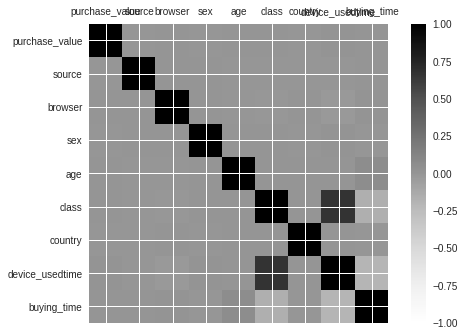

,purchase_value,source,browser,sex,age,class,country,device_usedtime,buying_time
purchase_value,1.000000,-0.000795,0.001299,-0.003341,0.000806,0.003540,-0.000648,0.011079,0.003015
source,-0.000795,1.000000,0.006748,0.001572,-0.001132,-0.003543,-0.002081,-0.001610,0.005772
browser,0.001299,0.006748,1.000000,0.000941,-0.002084,-0.014827,0.000771,-0.021340,0.011004
sex,-0.003341,0.001572,0.000941,1.000000,0.000907,0.007802,-0.002022,0.008540,-0.005682
age,0.000806,-0.001132,-0.002084,0.000907,1.000000,0.001329,0.000108,0.002144,0.061448
class,0.003540,-0.003543,-0.014827,0.007802,0.001329,1.000000,0.002697,0.671768,-0.157174
country,-0.000648,-0.002081,0.000771,-0.002022,0.000108,0.002697,1.000000,0.001969,-0.002890
device_usedtime,0.011079,-0.001610,-0.021340,0.008540,0.002144,0.671768,0.001969,1.000000,-0.201757
buying_time,0.003015,0.005772,0.011004,-0.005682,0.061448,-0.157174,-0.002890,-0.201757,1.000000


In [12]:
import matplotlib.pyplot as plt

correlations = df_result.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(df_result)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

I use 6 ML method to predict y_test and calcuating the result:
  - Logistic Regression
  - Decision Free
  - Random Forest
  - SGD 
  - KNN
  - Gaussian Naive Bayes
 Besides, I also plot the confusion matrix. This  is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.
 
 Moreover, the confusion matrix can give an idea for assigning the event row as “positive” and the no-event row as “negative“. We can then assign the event column of predictions as “true” and the no-event as “false“. This gives us:

  -   “true positive” for correctly predicted event values.
  -  “false positive” for incorrectly predicted event values.
  -  “true negative” for correctly predicted no-event values.
  -  “false negative” for incorrectly predicted no-event values.

We can summarize this in the confusion matrix as follows:
	
            |    event			    |no-event
    event   |	true positive	    |false positive
    no-event|    false negative	   |true negative

This can help in calculating more advanced classification metrics such as precision, recall, specificity and sensitivity of our classifier.

In [56]:
# Logistic Regression
start_time = time.time()
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = round(logreg.score(X_test, y_test) * 100, 2)
print('Logistic Regression accuracy score = %f' %score_logreg)
print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))

print("--- %s seconds ---" % (time.time() - start_time))

Logistic Regression accuracy score = 94.960000
Confusion matrix
[[34825   197]
 [ 1757  1965]]
--- 2.920809745788574 seconds ---


In [57]:
# Decision tree algorithm
start_time = time.time()
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
score_decisiontree = round(decision_tree.score(X_test, y_test) * 100, 2)
print('Logistic Regression accuracy score = %f' %score_decisiontree)
print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))

print("--- %s seconds ---" % (time.time() - start_time))

Logistic Regression accuracy score = 94.370000
Confusion matrix
[[34480   542]
 [ 1638  2084]]
--- 0.23912596702575684 seconds ---


In [58]:
# Random forest algorithm
start_time = time.time()
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
score_randomforest = round(random_forest.score(X_test, y_test) * 100, 2)
print('Logistic Regression accuracy score = %f' %score_randomforest)
print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))

print("--- %s seconds ---" % (time.time() - start_time))

Logistic Regression accuracy score = 94.770000
Confusion matrix
[[34635   387]
 [ 1640  2082]]
--- 7.097902536392212 seconds ---


In [59]:
# Stochastic Gradient Descent
start_time = time.time()
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
score_sgd = round(sgd.score(X_test, y_test) * 100, 2)
print('Stochastic Gradient Descent accuracy score = %f' %score_sgd)
print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))

print("--- %s seconds ---" % (time.time() - start_time))

Stochastic Gradient Descent accuracy score = 94.400000
Confusion matrix
[[34859   163]
 [ 2006  1716]]
--- 0.14350342750549316 seconds ---


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [61]:
#KNeighborsClassifier
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = round(knn.score(X_train, y_train) * 100, 2)
print('KNeighborsClassifier accuracy score = %f' %score_knn)
print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))

print("--- %s seconds ---" % (time.time() - start_time))

KNeighborsClassifier accuracy score = 95.310000
Confusion matrix
[[34822   200]
 [ 1700  2022]]
--- 19.25624990463257 seconds ---


In [63]:
# Gaussian Naive Bayes
start_time = time.time()
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
score_gnb = round(gaussian.score(X_train, y_train) * 100, 2)
print('KNeighborsClassifier accuracy score = %f' %score_gnb)
print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))

print("--- %s seconds ---" % (time.time() - start_time))

KNeighborsClassifier accuracy score = 95.190000
Confusion matrix
[[34818   204]
 [ 1709  2013]]
--- 0.08650493621826172 seconds ---


# Final result
As we can see above, in the algorithm testing, the Gaussian Naive Bayes give one of the most accurate results at 95.2%, however, the running time is extremely short when compared with the others algorithm. Therefore, we can choose Gaussian Naive Bayes algorithm as the most suitable way to solve this problem in this scenario.